# Classical Statistics - Exploring Classical Statistics with Practical Python Implementation

The kernel focuses on Exploratory Data Anaysis using classical statistical techniques. I have used (and referenced) quantitative techniques as well as graphical techniques to perform various tests. 

Let’s look at the different tests that can be carried out on any set of data:

1.	[Location](#1.-Location)

      a. [Confidence Limits for the Mean](#a.-Confidence-Limits-for-the-Mean)
        
      b. [One sample t-Test](#b.-One-sample-t-Test)
    
      c. [Two sample t-Test for Equal Means](#c.-Two-sample-t-Test-for-Equal-Means)
   
      d. [One-Way ANOVA test](#d.-One-Way-ANOVA-test)
    
2.	[Scale or variability or spread](#2.-Scale-or-variability-or-spread)

      a. [Bartlett Test](#a.-Bartlett-Test)
    
      b. [Levene Test]( #b.-Levene-Test)
    
3.	[Skewness and Kurtosis](#3.-Skewness-and-Kurtosis)

4.	[Distributional Measures](#4.-Distributional-Measures)

      a. [Quantile-Quantile Plot](#a.-Quantile-Quantile-Plot)
    
      b. [Shapiro-Wilk test](#b.-Shapiro-Wilk-Test)
    
      c. [D’Agostino’s K^2 Test](#c.-D’Agostino’s-K^2-Test)
    
      d. [Anderson Darling Test](#d.-Anderson-Darling-Test)
        
      e. [Chi-Squared Goodness of Fit Test](#e.-Chi-Squared-Goodness-of-Fit-Test)
        
      f. [Kolmogorov-Smirnov Test](#f.-Kolmogorov-Smirnov-Test)
    
5.	[Outlier detection](#5.-Outlier-detection)

      a. [Isolation Forest](#a.-Isolation-Forest)
    
      b. [Grubbs Test](#b.-Grubbs-Test)
    
      c. [Box plot and scatter plot](#c.-Box-plot-and-scatter-plot)
    
      d. [Z-Score](#d.-Z-Score)
    
      e. [IQR Score](#e.-IQR-Score)
        
      f. [Generalized Extreme Deviate Test](#f.-Generalized-Extreme-Deviate-Test)
        
      g. [Distance-based outlier detection](#g.-Distance-based-outlier-detection)
        
      h. [Outlier detection based on polynomial fit](#h.-Outlier-detection-based-on-polynomial-fit)

6.	[Feature Selection](#6.-Feature-Selection)

      a. [Univariate Selection](#a.-Univariate-Selection)
        
      b. [Recursive Feature Elimination](#b.-Recursive-Feature-Elimination)
        
      c. [Principal Component Analysis](#c.-Principal-Component-Analysis)
        
      d. [Linear Discriminant Analysis](#d.-Linear-Discriminant-Analysis)
        
      e. [Feature Importance](#e.-Feature-Importance)
    

---

In [1]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from numpy.random import seed
from numpy.random import randn
import seaborn as sns
from PyAstronomy import pyasl #pip install PyAstronomy

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import ExtraTreesClassifier

sns.set_style('whitegrid')

%matplotlib inline

# *1. Location*

### a. Confidence Limits for the Mean

Confidence limits for the mean **are an interval estimate for the mean.** 

Interval estimates are often desirable because the estimate of the mean varies from sample to sample. Instead of a single estimate for the mean, a confidence interval generates a lower and upper limit for the mean. The interval estimate gives an indication of how much uncertainty there is in our estimate of the true mean. The narrower the interval, the more precise is our estimate.

In [2]:
a=[1,2,3,4,5,6]

In [3]:
computed_mean = np.mean(a)
print(f"The computed mean is {computed_mean}")

interval = stats.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=stats.sem(a))
print(f"The mean has a confidence limit of {interval}")

The computed mean is 3.5
The mean has a confidence limit of (1.5366856922723917, 5.463314307727608)


In [4]:
b = [2.2,2.21,2.22,2.23,2.24,2.25]

In [5]:
computed_mean = np.mean(b)
print(f"The computed mean is {computed_mean}")

interval = stats.t.interval(0.95, len(b)-1, loc=np.mean(b), scale=stats.sem(b))
print(f"The mean has a confidence limit of {interval}")

The computed mean is 2.225
The mean has a confidence limit of (2.205366856922724, 2.244633143077276)


### b. One sample t-Test

A One Sample T-Test is a statistical test used to evaluate the null hypothesis that the mean **m** of a 1D sample dataset of independant observations is equal to the true mean **μ** of the population from which the data is sampled. In other words, our null hypothesis is that,

\begin{align}
m=μ
\end{align}

For all of the tests, I will be using a significance level of 0.05. If the p value is below 0.05, we will be rejecting the null hypothesis.

Let us generate some random data from the Normal Distriubtion. We will sample 50 points from a normal distribution with mean $μ$=0 and variance $σ^{2}=1$ and from another with mean $μ$=2 and variance $σ^{2}$=1.


In [6]:
data1 = np.random.normal(0, 1, size=50)
data2 = np.random.normal(2, 1, size=50)

In [7]:
true_mu = 0
# Checking for data1
onesample_results = stats.ttest_1samp(data1, true_mu)

onesample_results

TtestResult(statistic=1.2000635780624431, pvalue=0.2358847562044904, df=49)

Since our p-value is greater than our significance level, we have good evidence to not reject the null-hypothesis. This is our expected result because the data was collected from a normal distribution.

Example Kernel : https://www.kaggle.com/leandrovrabelo/t-test-on-alcohol-consumption

### c. Two sample t-Test for Equal Means

The two-sample t-test is used to determine if **two population means are equal.** 

In [8]:
twosample_results = stats.ttest_ind(data1, data2)
twosample_results

Ttest_indResult(statistic=-10.582055367421379, pvalue=6.62803627259823e-18)

Since our p-value is much less than our significance level, then with great evidence we can reject our null hypothesis of identical means. This is in alignment with our setup, since we sampled from two different normal pdfs with different means.


### d. One-Way ANOVA test

The one-way ANOVA tests the null hypothesis that **two or more groups have the same population mean**. The test is applied to samples from two or more groups, possibly with differing sizes.

In [9]:
x1 = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
x2 = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
x3 = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
x4 = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
x5 = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

stats.f_oneway(x1, x2, x3, x4, x5)

F_onewayResult(statistic=7.121019471642447, pvalue=0.0002812242314534545)

Since our p-value is much less than the significance level of 0.05, then with great evidence we can reject our null hypothesis of identical means. 

---

# *2. Scale or variability or spread*

### a. Bartlett Test

Bartlett’s test tests the null hypothesis that **all input samples are from populations with equal variances.** For samples from significantly non-normal populations, Levene’s test is more robust.

In [10]:
x1 = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
x2 = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
x3 = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
x4 = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
x5 = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

In [11]:
stats.bartlett(x1, x2, x3, x4, x5)

BartlettResult(statistic=2.434137301964408, pvalue=0.6564670643021054)

As the p value is higher than the significance level, all input samples are from populations with equal variance i.e. we do not reject the null hypothesis.

### b. Levene Test

The Levene test also tests the null hypothesis that **all input samples are from populations with equal variances.** Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

In [12]:
stats.levene(x1, x2, x3, x4, x5)

LeveneResult(statistic=0.1199559192932723, pvalue=0.9744415772405349)

As the p value is higher than the significance level, all input samples are from populations with equal variance i.e. we do not reject the null hypothesis.

---

# *3. Skewness and Kurtosis*

 For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution and < 0 means that there is more weight in the left tail of the distribution.

In [13]:
# Dummy data
x = np.random.normal(0, 2, 10000)   # create random values based on a normal distribution

Text(0.5, 1.0, 'Gaussian Distribution')

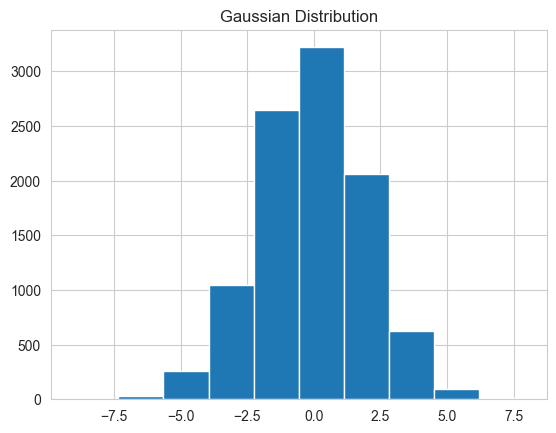

In [14]:
# The histogram plot
pd.Series(x).hist()
plt.title('Gaussian Distribution')

In [15]:
print( 'Excess kurtosis of normal distribution (should be 0): {}'.format( stats.kurtosis(x) ))
print( 'Skewness of normal distribution (should be 0): {}'.format( stats.skew(x) ))

Excess kurtosis of normal distribution (should be 0): 0.09215434079111073
Skewness of normal distribution (should be 0): -0.008652698704911392


In [16]:
# Dummy data
weibull_x = np.random.weibull(10., 10000)   # create random values based on a weibull distribution.

Text(0.5, 1.0, 'Weibull Distribution')

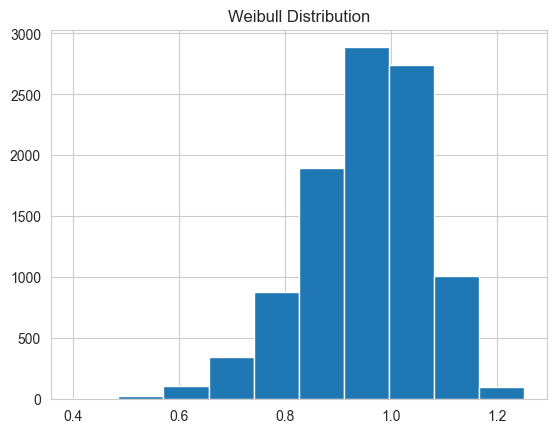

In [17]:
# The histogram plot
pd.Series(weibull_x).hist()
plt.title('Weibull Distribution')

In [18]:
print( 'Excess kurtosis of weibull distribution: {}'.format( stats.kurtosis(weibull_x) ))
print( 'Skewness of weibull distribution: {}'.format( stats.skew(weibull_x) ))

Excess kurtosis of weibull distribution: 0.6102910458963491
Skewness of weibull distribution: -0.650759570387331


---

# *4. Distributional Measures*

Creating random data,

In [19]:
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (np.mean(data), np.std(data)))

mean=50.303 stdv=4.426


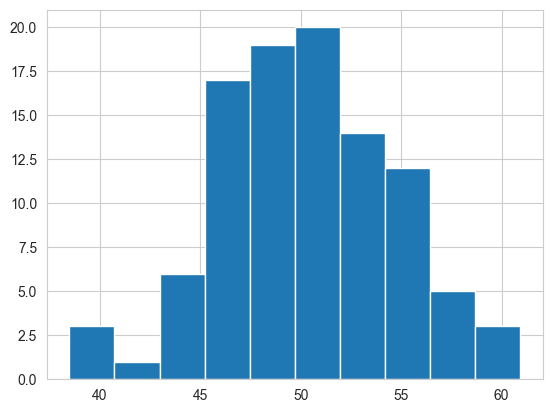

In [20]:
plt.hist(data);

### a. Quantile-Quantile Plot

In a QQ plot, **a perfect match for the normal distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right.** It can be used to check if a distribution is normal or not.

In [21]:
from statsmodels.graphics.gofplots import qqplot

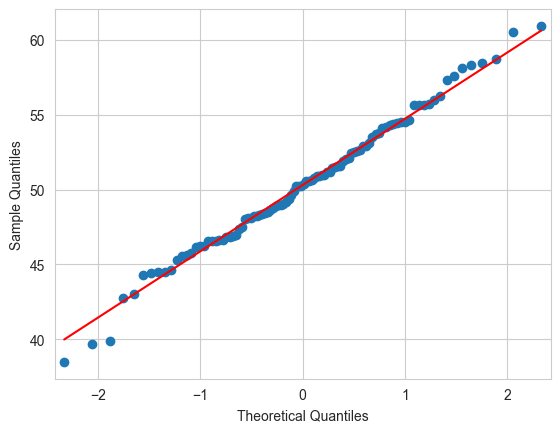

In [22]:
qqplot(data, line='s');

Running the example creates the QQ plot showing the scatter plot of points in a diagonal line, closely fitting the expected diagonal pattern for a sample from a Gaussian distribution.

### b. Shapiro-Wilk test

The Shapiro-Wilk test evaluates a data sample and **quantifies how likely it is that the data was drawn from a Gaussian distribution.** 

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.

In [23]:
stat, p = stats.shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


 The data is likely drawn from a Gaussian distribution.

### c. D’Agostino’s K^2 Test

The D’Agostino’s K^2 test **calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution.**

Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.

In [24]:
stat, p = stats.normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


### d. Anderson Darling Test

Anderson-Darling Test (Theodore Anderson and Donald Darling) is a statistical test that can be used **to evaluate whether a data sample comes from one of among many known data samples.**

It can be used to check whether a data sample is normal. The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.

The anderson() SciPy function implements the Anderson-Darling test. It takes as parameters the data sample and the name of the distribution to test it against. By default, the test will check against the Gaussian distribution (dist=’norm’).

We can interpret the results by failing to reject the null hypothesis that the data is normal if the calculated test statistic is less than the critical value at a chosen significance level.

In [25]:
result = stats.anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.220
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


### e. Chi-Squared Goodness of Fit Test

The chi-squared goodness of fit test or Pearson’s chi-squared test is **used to assess whether a set of data is consistent with proposed values for the parameters. **
 
Null hypothesis : Assume the observed values are similar as the expected values.

In [26]:
observed_values = np.array([18, 21, 16, 7, 15])
expected_values = np.array([22, 19, 44, 8, 16], dtype=float)  # Convert to float

expected_values *= observed_values.sum() / expected_values.sum()

result = stats.chisquare(observed_values, f_exp=expected_values)
print(result)

Power_divergenceResult(statistic=13.517394985397377, pvalue=0.00900583100968695)


As the p-value is very low than the significance level of 0.05, the null hypothesis is rejected.

### f. Kolmogorov-Smirnov Test

**This tests whether 2 samples are drawn from the same distribution.**

Null Hypothesis : Assume the samples are from the same distribution.

In [27]:
np.random.seed(12345678)  #fix random seed to get the same result
n1 = 200  # size of first sample
n2 = 300  # size of second sample

In [28]:
rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=n2, loc=0.5, scale=1.5)
stats.ks_2samp(rvs1, rvs2)

KstestResult(statistic=0.20833333333333334, pvalue=5.1292795977908046e-05, statistic_location=1.079426875125683, statistic_sign=1)

We can reject the null hypothesis since the p-value is below 0.05.

---

# *5. Outlier detection*

### a. Isolation Forest

Isolation forest’s basic principle is that outliers are few and far from the rest of the observations. To build a tree (training), the algorithm randomly picks a feature from the feature space and a random split value ranging between the maximums and minimums. This is made for all the observations in the training set. To build the forest a tree ensemble is made averaging all the trees in the forest.

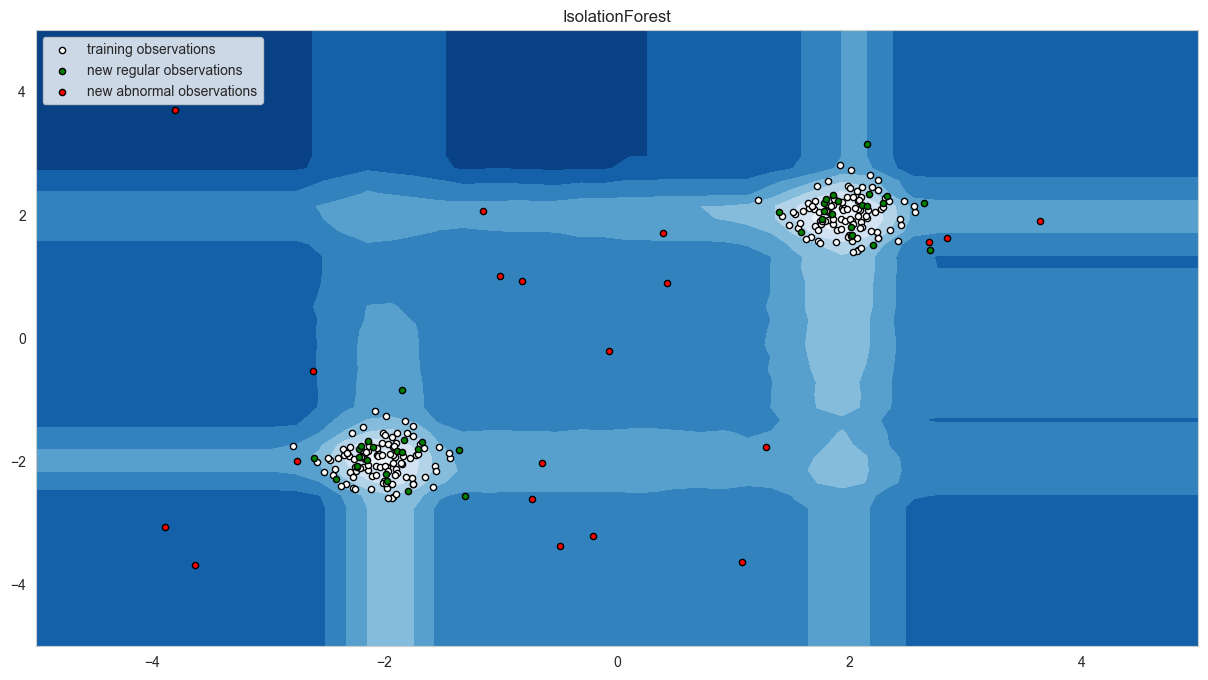

In [29]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100,random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15,8))

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
                
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left");

### b. Grubbs Test

Grubbs' test  is used to **detect a single outlier in a univariate data set that follows an approximately normal distribution.**

If you suspect more than one outlier may be present, it is recommended that you use either the Tietjen-Moore test or the generalized extreme studentized deviate test instead of the Grubbs' test.


In [30]:
from scipy.stats import t, zscore

def grubbs(X, test='two-tailed', alpha=0.05):

    '''
    Performs Grubbs' test for outliers recursively until the null hypothesis is
    true.

    Parameters
    ----------
    X : ndarray
        A numpy array to be tested for outliers.
    test : str
        Describes the types of outliers to look for. Can be 'min' (look for
        small outliers), 'max' (look for large outliers), or 'two-tailed' (look
        for both).
    alpha : float
        The significance level.

    Returns
    -------
    X : ndarray
        The original array with outliers removed.
    outliers : ndarray
        An array of outliers.
    '''
    print("Original data:",X)
    Z = zscore(X, ddof=1)  # Z-score
    N = len(X)  # number of samples

    # calculate extreme index and the critical t value based on the test
    if test == 'two-tailed':
        extreme_ix = lambda Z: np.abs(Z).argmax()
        t_crit = lambda N: t.isf(alpha / (2.*N), N-2)
    elif test == 'max':
        extreme_ix = lambda Z: Z.argmax()
        t_crit = lambda N: t.isf(alpha / N, N-2)
    elif test == 'min':
        extreme_ix = lambda Z: Z.argmin()
        t_crit = lambda N: t.isf(alpha / N, N-2)
    else:
        raise ValueError("Test must be 'min', 'max', or 'two-tailed'")

    # compute the threshold
    thresh = lambda N: (N - 1.) / np.sqrt(N) * \
        np.sqrt(t_crit(N)**2 / (N - 2 + t_crit(N)**2))

    # create array to store outliers
    outliers = np.array([])

    # loop throught the array and remove any outliers
    while abs(Z[extreme_ix(Z)]) > thresh(N):

        # update the outliers
        outliers = np.r_[outliers, X[extreme_ix(Z)]]
        # remove outlier from array
        X = np.delete(X, extreme_ix(Z))
        # repeat Z score
        Z = zscore(X, ddof=1)
        N = len(X)
    print("Cleaned Data",X ,"Outlier:",outliers)
    print("---")
    return X, outliers



# setup some test arrays
X = np.arange(-5, 6)
X1 = np.r_[X, 100]
X2 = np.r_[X, -100]

# test the two-tailed case
Y, out = grubbs(X1)
assert out == 100
Y, out = grubbs(X2)
assert out == -100

# test the max case
Y, out = grubbs(X1, test='max')
assert out == 100
Y, out = grubbs(X2, test='max')
assert len(out) == 0

# test the min case
Y, out = grubbs(X1, test='min')
assert len(out) == 0
Y, out = grubbs(X2, test='min')
assert out == -100

Original data: [ -5  -4  -3  -2  -1   0   1   2   3   4   5 100]
Cleaned Data [-5 -4 -3 -2 -1  0  1  2  3  4  5] Outlier: [100.]
---
Original data: [  -5   -4   -3   -2   -1    0    1    2    3    4    5 -100]
Cleaned Data [-5 -4 -3 -2 -1  0  1  2  3  4  5] Outlier: [-100.]
---
Original data: [ -5  -4  -3  -2  -1   0   1   2   3   4   5 100]
Cleaned Data [-5 -4 -3 -2 -1  0  1  2  3  4  5] Outlier: [100.]
---
Original data: [  -5   -4   -3   -2   -1    0    1    2    3    4    5 -100]
Cleaned Data [  -5   -4   -3   -2   -1    0    1    2    3    4    5 -100] Outlier: []
---
Original data: [ -5  -4  -3  -2  -1   0   1   2   3   4   5 100]
Cleaned Data [ -5  -4  -3  -2  -1   0   1   2   3   4   5 100] Outlier: []
---
Original data: [  -5   -4   -3   -2   -1    0    1    2    3    4    5 -100]
Cleaned Data [-5 -4 -3 -2 -1  0  1  2  3  4  5] Outlier: [-100.]
---


### c. Box plot and scatter plot

For this part of the notebook, we shall be using the Boston Housing dataset,

In [31]:
# Fetching the Boston  Dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Data Values
x = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

columns = ["CRIM","ZN","INDUS","CHAS","NOX", "RM","AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
boston_df = pd.DataFrame(x)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [32]:
boston_df.shape

(506, 13)

<Axes: xlabel='DIS'>

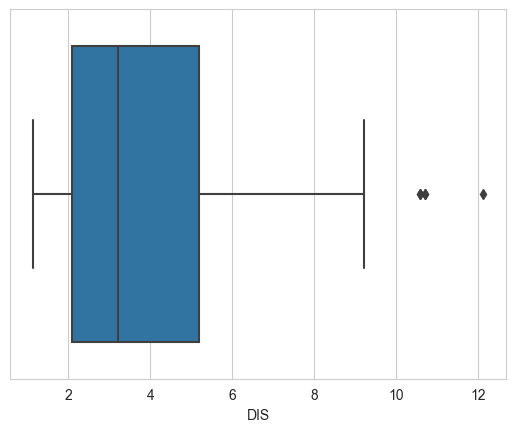

In [33]:
sns.boxplot(x=boston_df['DIS'])

Above plot shows three points between 10 to 12, these are outliers as there are not included in the box of other observation i.e no where near the quartiles. Box plot is useful for univariate data.

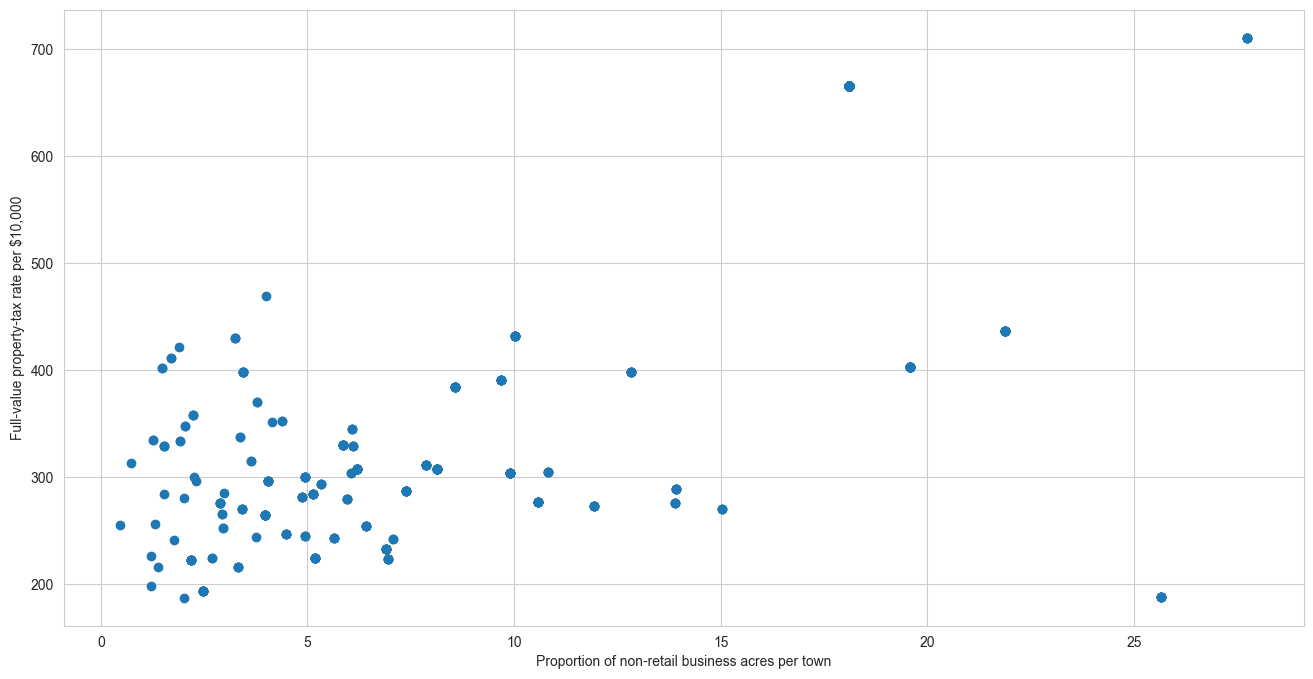

In [34]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

Looking at the plot above, we can most of data points are lying bottom left side but there are points which are far from the population like top right corner

### d. Z-Score

**The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.**

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points.

While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [35]:
z = np.abs(stats.zscore(boston_df))
print(z)

         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0    0.419782  0.284830  1.287909  0.272599  0.144217  0.413672  0.120013   
1    0.417339  0.487722  0.593381  0.272599  0.740262  0.194274  0.367166   
2    0.417342  0.487722  0.593381  0.272599  0.740262  1.282714  0.265812   
3    0.416750  0.487722  1.306878  0.272599  0.835284  1.016303  0.809889   
4    0.412482  0.487722  1.306878  0.272599  0.835284  1.228577  0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501  0.413229  0.487722  0.115738  0.272599  0.158124  0.439316  0.018673   
502  0.415249  0.487722  0.115738  0.272599  0.158124  0.234548  0.288933   
503  0.413447  0.487722  0.115738  0.272599  0.158124  0.984960  0.797449   
504  0.407764  0.487722  0.115738  0.272599  0.158124  0.725672  0.736996   
505  0.415000  0.487722  0.115738  0.272599  0.158124  0.362767  0.434732   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
0    0.14

In [36]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

Don’t be confused by the results. The first array contains the list of row numbers and second array respective column numbers, which mean z[55][1] has a Z-score higher than 3.

In [37]:
print(z.iloc[55][1])

3.375038763517294


So, the data point — 55th record on column ZN is an outlier.

In [38]:
z_filtered_df= boston_df[(z < 3).all(axis=1)]
z_filtered_df.shape

(415, 13)

So, above code removed around 90+ rows from the dataset i.e. outliers have been removed.

### e. IQR Score

Box plot uses the IQR method to display data and outliers(shape of the data) but **in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.**

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, 

\begin{align}
IQR = Q3 − Q1.
\end{align}

In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

In [39]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


The following code will remove the outliers from the dataset,

In [40]:
filtered_df =boston_df[~((boston_df < (Q1 - 1.5 * IQR))|(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]
filtered_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [41]:
filtered_df.shape

(274, 13)

### f. Generalized Extreme Deviate Test

The generalized ESD (Extreme Studentized Deviate) test is **used to detect one or more outliers in a univariate data set that follows an approximately normal distribution.**

Number of outliers:  3
Indices of outliers:  [53, 52, 51]
        R      Lambda
 1   3.14819   3.15879
 2   2.97114   3.15143
 3   3.21044   3.14389
 4   2.83814   3.13616
 5   2.84416   3.12825
 6   2.87769   3.12013
 7   2.30345   3.11180
 8   2.33534   3.10324
 9   2.12480   3.09446
10   2.09054   3.08542


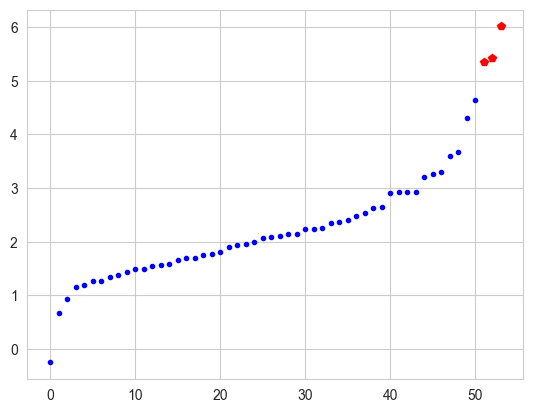

In [42]:
x = np.array([float(x) for x in "-0.25 0.68 0.94 1.15 1.20 1.26 1.26 1.34 1.38 1.43 1.49 1.49 \
          1.55 1.56 1.58 1.65 1.69 1.70 1.76 1.77 1.81 1.91 1.94 1.96 \
          1.99 2.06 2.09 2.10 2.14 2.15 2.23 2.24 2.26 2.35 2.37 2.40 \
          2.47 2.54 2.62 2.64 2.90 2.92 2.92 2.93 3.21 3.26 3.30 3.59 \
          3.68 4.30 4.64 5.34 5.42 6.01".split()])

# Apply the generalized ESD
r = pyasl.generalizedESD(x, 10, 0.05, fullOutput=True)

print("Number of outliers: ", r[0])
print("Indices of outliers: ", r[1])
print("        R      Lambda")
for i in range(len(r[2])):
    print("%2d  %8.5f  %8.5f" % ((i+1), r[2][i], r[3][i]))

# Plot the "data"
plt.plot(x, 'b.')
# and mark the outliers.
for i in range(r[0]):
    plt.plot(r[1][i], x[r[1][i]], 'rp')
plt.show()

### g. Distance-based outlier detection

The generalized ESD test requires approximate normal distribution for the data points, which—for example in the case of a spectrum—can be a harsh limitation.

This function applies the generalized ESD test to the distances between adjacent data points, which are then requires to be distributed approximately normally. It will characterize a data point as an outlier, only if the distances to its right and left neighbor are abnormal as judged by the generalized ESD.

Number of outliers detected:  2
Indices of these outliers:  [27, 43]


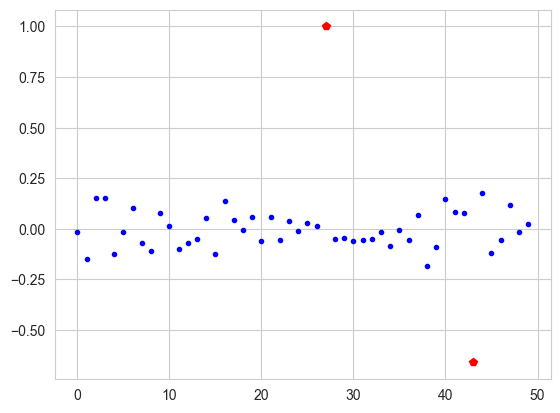

In [43]:
# Get some data
x = np.random.normal(0.,0.1,50)

# Introduce outliers
x[27] = 1.0
x[43] = -0.66

# Run distance based outlier detection
r = pyasl.pointDistGESD(x, 5)

print("Number of outliers detected: ", r[0])
print("Indices of these outliers: ", r[1])

plt.plot(x, 'b.')
for i in range(len(r[1])):
    plt.plot(r[1][i], x[r[1][i]], 'rp')
plt.show()

### h. Outlier detection based on polynomial fit


The algorithm implemented here is based on a polynomial fit to the data. After the fit is subtracted, the residuals are calculated. Based on their standard deviation, points with residuals deviating by more than the specified number of standard deviations from the fit are identified. Implementations with a single polynomial fit and a sliding window are available.

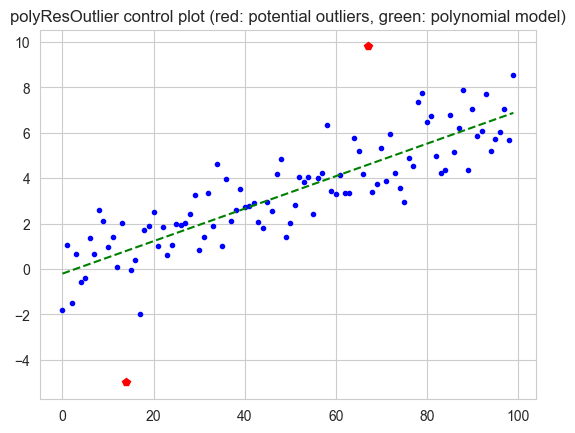

Number of outliers:  2
Indices of outliers:  [14 67]


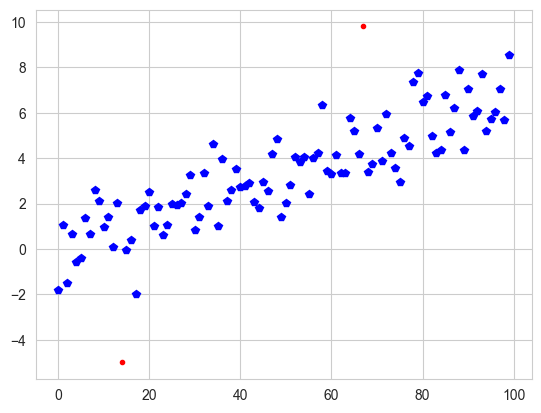

In [44]:
# Generate some "data"
x = np.arange(100)
y = np.random.normal(x*0.067, 1.0, len(x))

# Introduce an outliers
y[14] = -5.0
y[67] = +9.8

# Find outliers based on a linear (deg = 1) fit.
# Assign outlier status to all points deviating by
# more than 3.0 standard deviations from the fit,
# and show a control plot.
iin, iout = pyasl.polyResOutlier(x, y, deg=1, stdlim=3.0, controlPlot=True)

# What about the outliers
print("Number of outliers: ", len(iout))
print("Indices of outliers: ", iout)

# Remove outliers
xnew, ynew = x[iin], y[iin]

# Plot result (outlier in red)
plt.plot(x, y, 'r.')
plt.plot(xnew, ynew, 'bp');

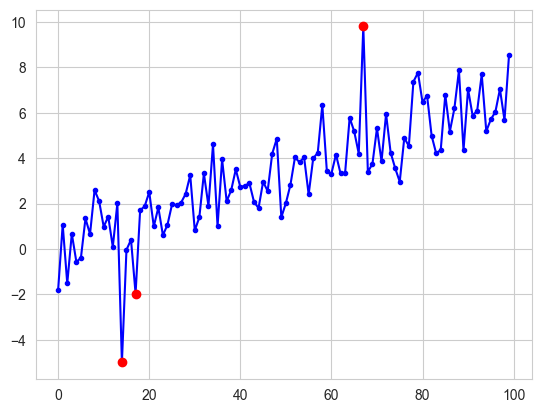

Number of outliers:  3
Indices of outliers:  [14 17 67]


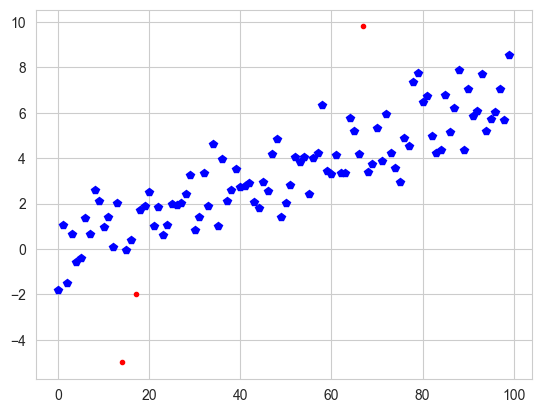

In [45]:
iin, iout = pyasl.slidingPolyResOutlier(x, y, 20, deg=1, stdlim=3.0, controlPlot=True)

# What about the outliers
print("Number of outliers: ", len(iout))
print("Indices of outliers: ", iout)

# Remove outliers
xnew, ynew = x[iin], y[iin]

# Plot result (outlier in red)
plt.plot(x, y, 'r.')
plt.plot(xnew, ynew, 'bp')


---

# *6. Feature Selection*

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

**Note** : No feature scaling has been done in these exampls. A good way of carrying out feature selection is by first scaling the features and then fitting them to the model.

### a. Univariate Selection

The example below uses the chi squared (chi^2) statistical test for non-negative features to select 4 of the best features from the Pima Indians onset of diabetes dataset.

In [46]:
dataframe = pd.read_csv('data/diabetes.csv')
arr = dataframe.values
X = arr[:,0:8]
y = arr[:,8]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


In [47]:
dataframe[['Glucose','Insulin','BMI','Age']].head()

,Glucose,Insulin,BMI,Age
0,148,0,33.6,50
1,85,0,26.6,31
2,183,0,23.3,32
3,89,94,28.1,21
4,137,168,43.1,33


You can see the scores for each attribute and the 4 attributes chosen (those with the highest scores) are Glucose, Insulin, BMI and Age.

### b. Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

The example below uses RFE with the logistic regression algorithm to select the top 3 features.


In [48]:
X = arr[:, 0:8]
y = arr[:, 8]
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=3, step=1)
fit = rfe.fit(X, y)
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking: %s", fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: %s [1 2 4 5 6 1 1 3]


C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# The best 3 features
dataframe.iloc[:,:-1].columns[fit.support_]

Index(['Pregnancies', 'BMI', 'DiabetesPedigreeFunction'], dtype='object')

You can see that RFE chose the the top 3 features as Pregnancies, BMI and DiabetesPedigreeFunction.

These are marked True in the support_ array and marked with a choice “1” in the ranking_ array.

### c. Principal Component Analysis

Principal Component Analysis (or PCA) **uses linear algebra to transform the dataset into a compressed form.**

Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.

In [50]:
X = arr[:,0:8]
y = arr[:,8]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance:", fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


### d. Linear Discriminant Analysis

Linear Discriminant Analysis (or LDA) uses linear algebra to transform the dataset into a compressed form while separating the dependent variable values as much as possible. 

In [51]:
X = arr[:,0:8]
y = arr[:,8]
# feature extraction
lda = LDA(n_components=None)
fit = lda.fit(X,y) 
# summarize components
print("Explained Variance:", fit.explained_variance_ratio_)

Explained Variance: [1.]


### e. Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In [52]:
X = arr[:,0:8]
y = arr[:,8]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.108 0.243 0.098 0.079 0.072 0.142 0.12  0.138]


In [53]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

You can see that we are given an importance score for each attribute where the larger score, the more important the attribute.

\begin{align}
The\;end
\end{align}

---